# IE 598 Week5 Homework Part1

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
import time

# for sklearn 0.18's alternative syntax
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [2]:
# Read dataset
data = pd.read_csv('hw5_treasury yield curve data.csv')
data.drop('Date', axis=1, inplace=True)
data.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


### Part1: Explotary Data Analysis

In [3]:
# There are some missing values in the target column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 31 columns):
SVENF01      8353 non-null float64
SVENF02      8353 non-null float64
SVENF03      8353 non-null float64
SVENF04      8353 non-null float64
SVENF05      8353 non-null float64
SVENF06      8353 non-null float64
SVENF07      8353 non-null float64
SVENF08      8353 non-null float64
SVENF09      8353 non-null float64
SVENF10      8353 non-null float64
SVENF11      8353 non-null float64
SVENF12      8353 non-null float64
SVENF13      8353 non-null float64
SVENF14      8353 non-null float64
SVENF15      8353 non-null float64
SVENF16      8353 non-null float64
SVENF17      8353 non-null float64
SVENF18      8353 non-null float64
SVENF19      8353 non-null float64
SVENF20      8353 non-null float64
SVENF21      8353 non-null float64
SVENF22      8353 non-null float64
SVENF23      8353 non-null float64
SVENF24      8353 non-null float64
SVENF25      8353 non-null float64
SVENF26      8353 

In [4]:
# Drop them
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 0 to 8070
Data columns (total 31 columns):
SVENF01      8071 non-null float64
SVENF02      8071 non-null float64
SVENF03      8071 non-null float64
SVENF04      8071 non-null float64
SVENF05      8071 non-null float64
SVENF06      8071 non-null float64
SVENF07      8071 non-null float64
SVENF08      8071 non-null float64
SVENF09      8071 non-null float64
SVENF10      8071 non-null float64
SVENF11      8071 non-null float64
SVENF12      8071 non-null float64
SVENF13      8071 non-null float64
SVENF14      8071 non-null float64
SVENF15      8071 non-null float64
SVENF16      8071 non-null float64
SVENF17      8071 non-null float64
SVENF18      8071 non-null float64
SVENF19      8071 non-null float64
SVENF20      8071 non-null float64
SVENF21      8071 non-null float64
SVENF22      8071 non-null float64
SVENF23      8071 non-null float64
SVENF24      8071 non-null float64
SVENF25      8071 non-null float64
SVENF26      8071 

In [5]:
data.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [6]:
# Correlation between some columns and the target column
corMat = pd.DataFrame(data[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'Adj_Close']].corr())
corMat

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,Adj_Close
SVENF01,1.000000,0.986417,0.958364,0.924637,0.890691,-0.849562
SVENF02,0.986417,1.000000,0.991325,0.971026,0.945906,-0.884194
SVENF03,0.958364,0.991325,1.000000,0.993681,0.978891,-0.898952
SVENF04,0.924637,0.971026,0.993681,1.000000,0.995480,-0.903707
SVENF05,0.890691,0.945906,0.978891,0.995480,1.000000,-0.903779
Adj_Close,-0.849562,-0.884194,-0.898952,-0.903707,-0.903779,1.000000


In [7]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

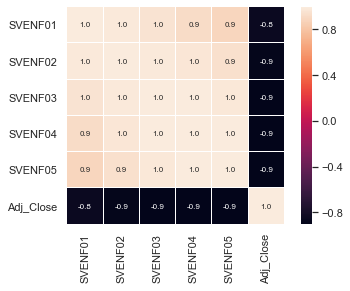

In [8]:
# Heat map
cm = np.corrcoef(data[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'Adj_Close']].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 linewidths = 0.1,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 8},
                 yticklabels=['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'Adj_Close'],
                 xticklabels=['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'Adj_Close'])

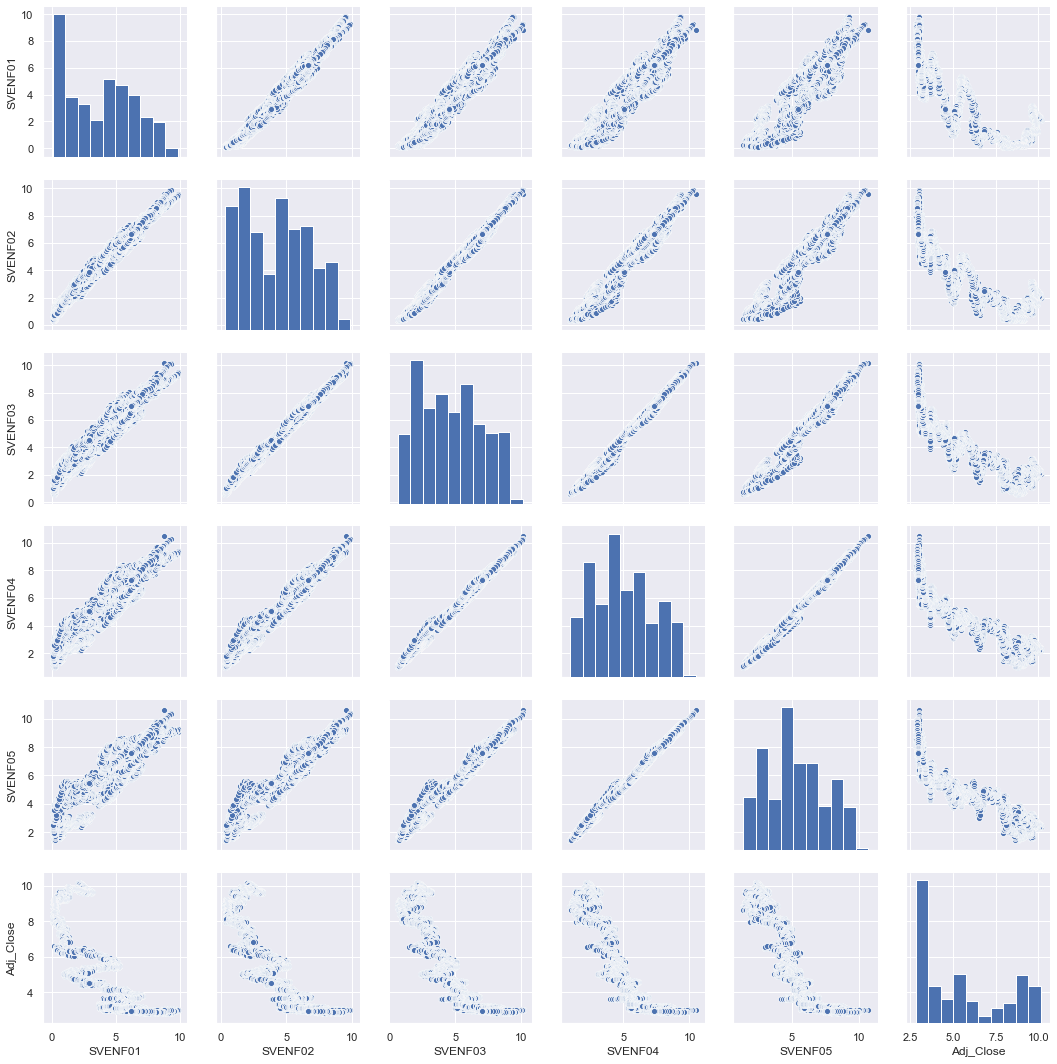

In [9]:
sns.pairplot(data[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'Adj_Close']])

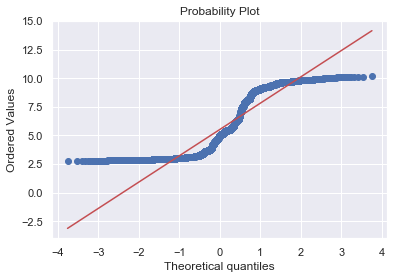

In [10]:
# Q-Q Plot
from scipy import stats
stats.probplot(data.Adj_Close, dist="norm", plot=plt)
plt.show()

### Part2: Regression on the Original Data (without PCA)

In [11]:
# Normalization
normalized_df = data.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
normalized_df.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,0.210418,0.177742,0.154698,0.129640,0.103464,0.089128,0.089251,0.090663,0.092575,0.094454,...,0.204068,0.227473,0.247946,0.265945,0.281795,0.295822,0.308295,0.319423,0.329386,0.997287
1,0.210572,0.178275,0.155465,0.130604,0.104668,0.090554,0.090903,0.092513,0.094630,0.096685,...,0.206489,0.229796,0.250172,0.268081,0.283850,0.297791,0.310193,0.321244,0.331144,0.997287
2,0.206825,0.174499,0.152817,0.128709,0.102879,0.088442,0.088302,0.089467,0.091296,0.093264,...,0.206655,0.229742,0.249801,0.267300,0.282597,0.296005,0.307793,0.318199,0.327400,1.000000
3,0.211393,0.180806,0.159196,0.134711,0.108526,0.093761,0.093258,0.094082,0.095554,0.097171,...,0.210536,0.234055,0.254613,0.272647,0.288504,0.302520,0.314933,0.325992,0.335855,0.997287
4,0.208642,0.177407,0.156348,0.132340,0.106293,0.091406,0.090691,0.091283,0.092598,0.094165,...,0.208015,0.231266,0.251497,0.269165,0.284631,0.298197,0.310143,0.320697,0.330047,0.997287


In [12]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df[normalized_df.columns[:-1]], normalized_df[normalized_df.columns[-1]], test_size=.15, random_state=42)
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (6860, 30)
Shape of y_train:  (6860,)
Shape of X_test:  (1211, 30)
Shape of y_test:  (1211,)


In [13]:
# A general function
def model_fitting(model, algorithm, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_R2_score = model.score(X_train, y_train)
    train_RMSE = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_R2_score = model.score(X_test, y_test)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Result of {}'.format(algorithm))
    table= PrettyTable([' ', 'R2', 'RMSE'])
    table.add_row(['train set', train_R2_score, train_RMSE])
    table.add_row(['test set', test_R2_score, test_RMSE])
    print(table)

In [14]:
# Linear Regression
LR_model = LinearRegression()
start = time.clock()
model_fitting(LR_model, 'LinearRegression', X_train, y_train, X_test, y_test)
end = time.clock()
print('Run time: ', end - start, 's')

Result of LinearRegression
+-----------+--------------------+---------------------+
|           |         R2         |         RMSE        |
+-----------+--------------------+---------------------+
| train set | 0.9022730353400433 | 0.10568051677260129 |
|  test set | 0.9041309535337229 |  0.1064583407727035 |
+-----------+--------------------+---------------------+
Run time:  0.014797199999975419 s


C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [15]:
# Support Vector Regression (just using default parameter)
SVR_model = SVR()
start = time.clock()
model_fitting(SVR_model, 'SVR', X_train, y_train, X_test, y_test)
end = time.clock()
print('Run time: ', end - start, 's')

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Result of SVR
+-----------+--------------------+---------------------+
|           |         R2         |         RMSE        |
+-----------+--------------------+---------------------+
| train set | 0.9602915856182184 |  0.0673641750834431 |
|  test set | 0.9604449165308491 | 0.06838197531019444 |
+-----------+--------------------+---------------------+
Run time:  0.8045400000000882 s


C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


### Part3: Regression on the transformed data

In [16]:
X = normalized_df[normalized_df.columns[:-1]]
y = normalized_df[normalized_df.columns[-1]]

In [17]:
# Explained variance ratio for all components
pca_1 = PCA()
pca_1.fit(X)
print('Explained variance ratio: ', pca_1.explained_variance_ratio_)

Explained variance ratio:  [9.31083603e-01 3.37085609e-02 2.91907256e-02 5.14898294e-03
 7.80475740e-04 7.62889113e-05 1.00865248e-05 1.18270327e-06
 8.65009410e-08 6.87456683e-09 4.75494556e-10 3.75799123e-11
 9.21055217e-12 8.83606962e-12 8.48915937e-12 8.42559096e-12
 8.33769706e-12 8.22520355e-12 8.08540937e-12 7.82729679e-12
 7.58801337e-12 7.30887692e-12 7.15132649e-12 6.98282822e-12
 6.73739146e-12 6.48856183e-12 6.16625685e-12 5.84889085e-12
 5.60336403e-12 5.52136616e-12]


In [18]:
# Explained variance ratio for all components when n_components = 3
pca_2 = PCA(n_components=3)
pca_2.fit(X)
print('Explained variance ratio of the 3-component version: ', pca_2.explained_variance_ratio_)
print('Explained variance of the 3-component version: ', pca_2.explained_variance_)

Explained variance ratio of the 3-component version:  [0.9310836  0.03370856 0.02919073]
Explained variance of the 3-component version:  [1.33947287 0.04849371 0.04199428]


In [19]:
# Split new data into training and test sets
transformed_X = pca_2.transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(transformed_X, y, test_size=.15, random_state=42)
print('Shape of X_train_pca: ', X_train_pca.shape)
print('Shape of y_train_pca: ', y_train_pca.shape)
print('Shape of X_test_pca: ', X_test_pca.shape)
print('Shape of y_test_pca: ', y_test_pca.shape)

Shape of X_train_pca:  (6860, 3)
Shape of y_train_pca:  (6860,)
Shape of X_test_pca:  (1211, 3)
Shape of y_test_pca:  (1211,)


In [20]:
# Linear Regression
LR_model_pca = LinearRegression()
start = time.clock()
model_fitting(LR_model_pca, 'Linear Regression', X_train_pca, y_train_pca, X_test_pca, y_test_pca)
end = time.clock()
print('Run time: ', end - start, 's')

Result of Linear Regression
+-----------+--------------------+---------------------+
|           |         R2         |         RMSE        |
+-----------+--------------------+---------------------+
| train set | 0.8670100460798755 | 0.12328128173793479 |
|  test set | 0.8661066315993872 |  0.125811408051376  |
+-----------+--------------------+---------------------+
Run time:  0.006268000000090979 s


C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [21]:
# Support Vector Regression (just using default parameter)
SVR_model_pca = SVR()
start = time.clock()
model_fitting(SVR_model_pca, 'SVR', X_train_pca, y_train_pca, X_test_pca, y_test_pca)
end = time.clock()
print('Run time: ', end - start, 's')

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Result of SVR
+-----------+--------------------+---------------------+
|           |         R2         |         RMSE        |
+-----------+--------------------+---------------------+
| train set | 0.9636808958469562 | 0.06442512755761978 |
|  test set | 0.9654057935303066 | 0.06395023956784272 |
+-----------+--------------------+---------------------+
Run time:  0.24117740000019694 s


C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [22]:
print("My name is Zizheng Zhang")
print("My NetID is: zizheng2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zizheng Zhang
My NetID is: zizheng2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
